<a href="https://colab.research.google.com/github/RamiroCabri1/Precios_de_inmuebles_regresion_lineal/blob/main/precios_de_inmuebles_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [3]:
#Leyendo los datos
import pandas as pd

path = "/content/drive/MyDrive/DataAnalisis/Alura/precios_casas.csv"
df = pd.read_csv(path)
df

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.00
1,2,117.2398,0,0.0000,2,460,0,894795.00
2,3,85.4680,1,80.4514,2,608,0,1101855.00
3,4,89.2769,1,70.2324,1,642,0,690200.00
4,5,106.3705,1,97.8237,2,836,0,1232500.00
...,...,...,...,...,...,...,...,...
1433,1456,88.5337,1,64.4726,2,460,0,862750.00
1434,1457,192.5817,0,0.0000,2,500,0,1035300.00
1435,1458,110.3652,1,107.0208,2,252,0,1313845.00
1436,1459,100.1462,0,0.0000,1,240,0,700676.25


In [4]:
#Cuáles factores fueron colectados
df.shape

(1438, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [6]:
df.isnull().sum()

,0
Id,0
area_primer_piso,0
tiene_segundo_piso,0
area_segundo_piso,0
cantidad_banos,0
capacidad_carros_garage,0
calidad_de_cocina_excelente,0
precio_de_venta,0


El dataSet no presenta valores nulos, tampoco objetos a modificar. Si eliminaremos la columna ID.

In [7]:
df.drop(columns="Id", inplace=True)

In [8]:
df

,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,79.5224,1,79.3366,2,548,0,1027905.00
1,117.2398,0,0.0000,2,460,0,894795.00
2,85.4680,1,80.4514,2,608,0,1101855.00
3,89.2769,1,70.2324,1,642,0,690200.00
4,106.3705,1,97.8237,2,836,0,1232500.00
...,...,...,...,...,...,...,...
1433,88.5337,1,64.4726,2,460,0,862750.00
1434,192.5817,0,0.0000,2,500,0,1035300.00
1435,110.3652,1,107.0208,2,252,0,1313845.00
1436,100.1462,0,0.0000,1,240,0,700676.25


## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  



In [9]:
# Correlación
correlacion = df.corr()

In [10]:
correlacion.precio_de_venta.sort_values(ascending=False)

,precio_de_venta
precio_de_venta,1.000000
capacidad_carros_garage,0.640214
area_primer_piso,0.616557
cantidad_banos,0.563132
calidad_de_cocina_excelente,0.496223
area_segundo_piso,0.305311
tiene_segundo_piso,0.138541


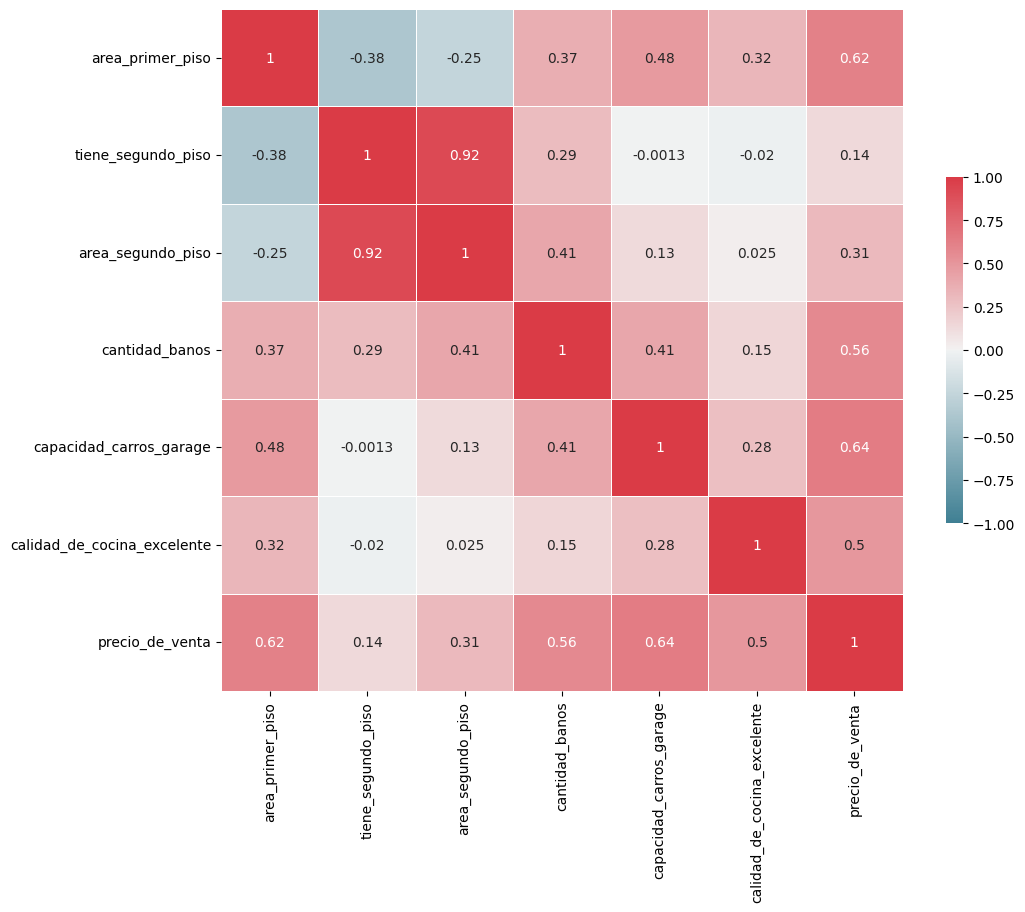

In [11]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlacion,  cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

## Relacionando variables

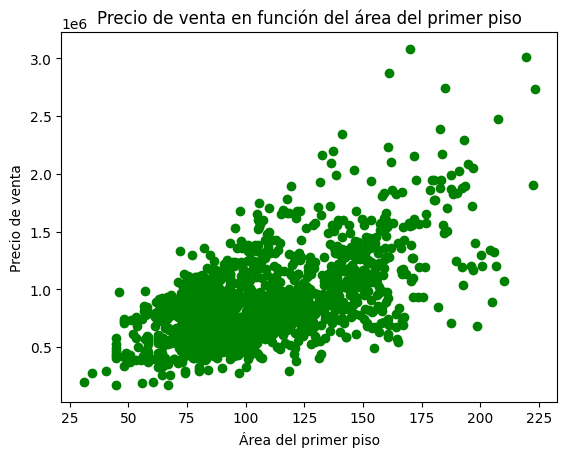

In [12]:
# Cómo se relacionan el área construída y el precio del inmueble?
plt.scatter(df.area_primer_piso, df.precio_de_venta, color="green")
plt.title("Precio de venta en función del área del primer piso")
plt.xlabel("Área del primer piso")
plt.ylabel("Precio de venta")
plt.show()

Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.

## Creando una recta

In [13]:
import  plotly.express as px

px.scatter(df, x="area_primer_piso", y="precio_de_venta", trendline="ols",trendline_color_override="red")


# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
df.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

In [16]:
#Datos de entrenamiento para usar la fórmula
y = df.precio_de_venta
X = df[['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]

In [17]:
# importar ols
from statsmodels.formula.api import ols
# dividiendo entre test y entrenamiento
y_train, y_test, X_train, X_test = train_test_split(y, X, test_size=0.2, random_state=42)

In [18]:
# ajustando el primer modelo
modelo = ols('precio_de_venta ~ area_primer_piso + tiene_segundo_piso + area_segundo_piso + cantidad_banos + capacidad_carros_garage + calidad_de_cocina_excelente', data=pd.concat([X_train, y_train], axis=1)).fit()

In [19]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        precio_de_venta   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     574.9
Date:                Mon, 04 Aug 2025   Prob (F-statistic):               0.00
Time:                        15:37:37   Log-Likelihood:                -15599.
No. Observations:                1150   AIC:                         3.121e+04
Df Residuals:                    1143   BIC:                         3.125e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -8.127e+04   2.52e+04     -3.225      0.001   -1.31e+05   -3.18e+04
area_primer_piso             4782.6008    241.623     19.794      0.000    4308.527    5256.675
tiene_segundo_piso          -1.228e+05   3.19e+04     -3.851      0.000   -1.85e+05   -6.03e+04
area_segundo_piso            4444.6049    400.107     11.109      0.000    3659.579    5229.631
cantidad_banos               7.252e+04   1.34e+04      5.407      0.000    4.62e+04    9.88e+04
capacidad_carros_garage       476.2136     32.433     14.683      0.000     412.579     539.848
calidad_de_cocina_excelente  4.162e+05   2.46e+04     16.929      0.000    3.68e+05    4.64e+05
==============================================================================
Omnibus:                      124.070   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              816.410
Skew:                           0.229   Prob(JB):                    5.23e-178
Kurtosis:                       7.102   Cond. No.                     3.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

En el contexto de un modelo de regresión lineal, la multicolinealidad es un fenómeno que ocurre cuando dos o más variables independientes están fuertemente correlacionadas entre sí. Esto crea una superposición o redundancia de información, lo que dificulta al modelo de regresión determinar el efecto único de cada variable independiente sobre la variable dependiente.

Bederiamos identificar y eliminar del modelo aquellas variables que están altamente correlacionadas entre sí. El objetivo es reducir la redundancia y mantener solo las variables que aportan información única e independiente.

In [20]:
# creamos otro modelo pero con solo 2 variables.

modelo_1 = ols('precio_de_venta ~ area_primer_piso', data=pd.concat([X_train, y_train], axis=1)).fit()
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        precio_de_venta   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     699.8
Date:                Mon, 04 Aug 2025   Prob (F-statistic):          8.41e-121
Time:                        15:37:37   Log-Likelihood:                -16125.
No. Observations:                1150   AIC:                         3.225e+04
Df Residuals:                    1148   BIC:                         3.226e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.364e+05   2.96e+04      4.608      0.000    7.83e+04    1.94e+05
area_primer_piso  6986.3852    264.093     26.454      0.000    6468.227    7504.543
==============================================================================
Omnibus:                      199.506   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              463.549
Skew:                           0.954   Prob(JB):                    2.20e-101
Kurtosis:                       5.456   Cond. No.                         378.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Analizando los coeficientes

(intensidad, dirección y significancia)




In [21]:
# visualizando los parámetros
modelo_1.params

,0
Intercept,136408.906347
area_primer_piso,6986.385203


En el modelo 1 el metodo params nos indica que el punto de corte en el eje y esde 136408.906347, y por cada aumento del valor de area_primer_piso existe un aumento de precio de 6986.385203.

In [22]:
# El resumen del modelo
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        precio_de_venta   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     699.8
Date:                Mon, 04 Aug 2025   Prob (F-statistic):          8.41e-121
Time:                        15:37:37   Log-Likelihood:                -16125.
No. Observations:                1150   AIC:                         3.225e+04
Df Residuals:                    1148   BIC:                         3.226e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.364e+05   2.96e+04      4.608      0.000    7.83e+04    1.94e+05
area_primer_piso  6986.3852    264.093     26.454      0.000    6468.227    7504.543
==============================================================================
Omnibus:                      199.506   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              463.549
Skew:                           0.954   Prob(JB):                    2.20e-101
Kurtosis:                       5.456   Cond. No.                         378.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $136408.906347. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6986.385203. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6986.385203.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [23]:
# observando el R²
modelo_1.rsquared

np.float64(0.3787308485660442)

El R2 representa la proporción de la varianza en la variable dependiente (el precio) que es explicada por las variables independientes (las variables predictoras) en el modelo.

 0.378 significa que el modelo explica el 37.8% de la variabilidad total en los precios de las viviendas.

 El 62.2% restante de la variabilidad en los precios (1−0.378) se debe a factores que no están incluidos en el modelo

## Entendiendo el resíduo

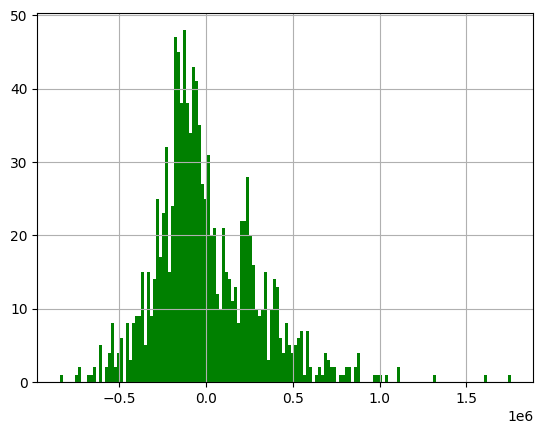

In [24]:
# Cómo están distribuidos
modelo_1.resid.hist(bins=150, color="green")
plt.show()

Los residuos son la parte de la variable dependiente que el modelo no fue capaz de explicar. Son los "errores" del mismo.

Un supuesto fundamental de la regresión lineal es que los residuos deben seguir una distribución normal con una media de cero.

El histograma tiene una forma que se asemeja bastante a una campana, lo que es una característica de una distribución normal. Esto es una buena señal, ya que sugiere que los errores del modelo no están sesgados de manera sistemática en una dirección u otra.

La mayor parte de la distribución de los residuos se centra alrededor de cero. Esto es lo ideal. Si la media de los residuos estuviera lejos de cero (por ejemplo, si la mayoría estuvieran en valores positivos o negativos), sugeriría que el modelo está sesgado y subestima o sobreestima consistentemente los valores. En el gráfico, el pico más alto está justo antes del 0, lo que es muy bueno.

La distribución parece ser razonablemente simétrica, lo que también apoya el supuesto de normalidad.

Aunque la mayoría de los residuos se agrupan en el centro, hay algunos valores atípicos (los valores en las "colas" de la distribución, cerca de -0.5e6 y 1.0e6). Esto significa que el modelo cometió algunos errores grandes, prediciendo precios que estaban muy lejos de los valores reales. Estos puntos pueden ser dignos de una investigación más profunda, ya que podrían ser datos atípicos (outliers) o casos que el modelo no puede capturar adecuadamente.

## Obteniendo el R² de la previsión

In [25]:
# definiendo la 'Y' prevista
y_predicion = modelo_1.predict(X_test)

Utilizamos la funcion predict con los datos de testeo para evaluar el funcionamiento del modelocon r2_score.

In [26]:
# importando el r2_score
from sklearn.metrics import r2_score

In [27]:
# mostrando el resultado de r²
print(r2_score(y_test, y_predicion))

0.38492593921885443


Como podemos ver tenemos casi un 38,5% contra un 37,8%, esto quiere decir que las variables independientes elegidas explican un 38% el resultado de las variables dependientes ( el precio ). Esto ,por obvias razones, da lugar a mejoras, ya que existecasi un 62% que se nos escapa.   

# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

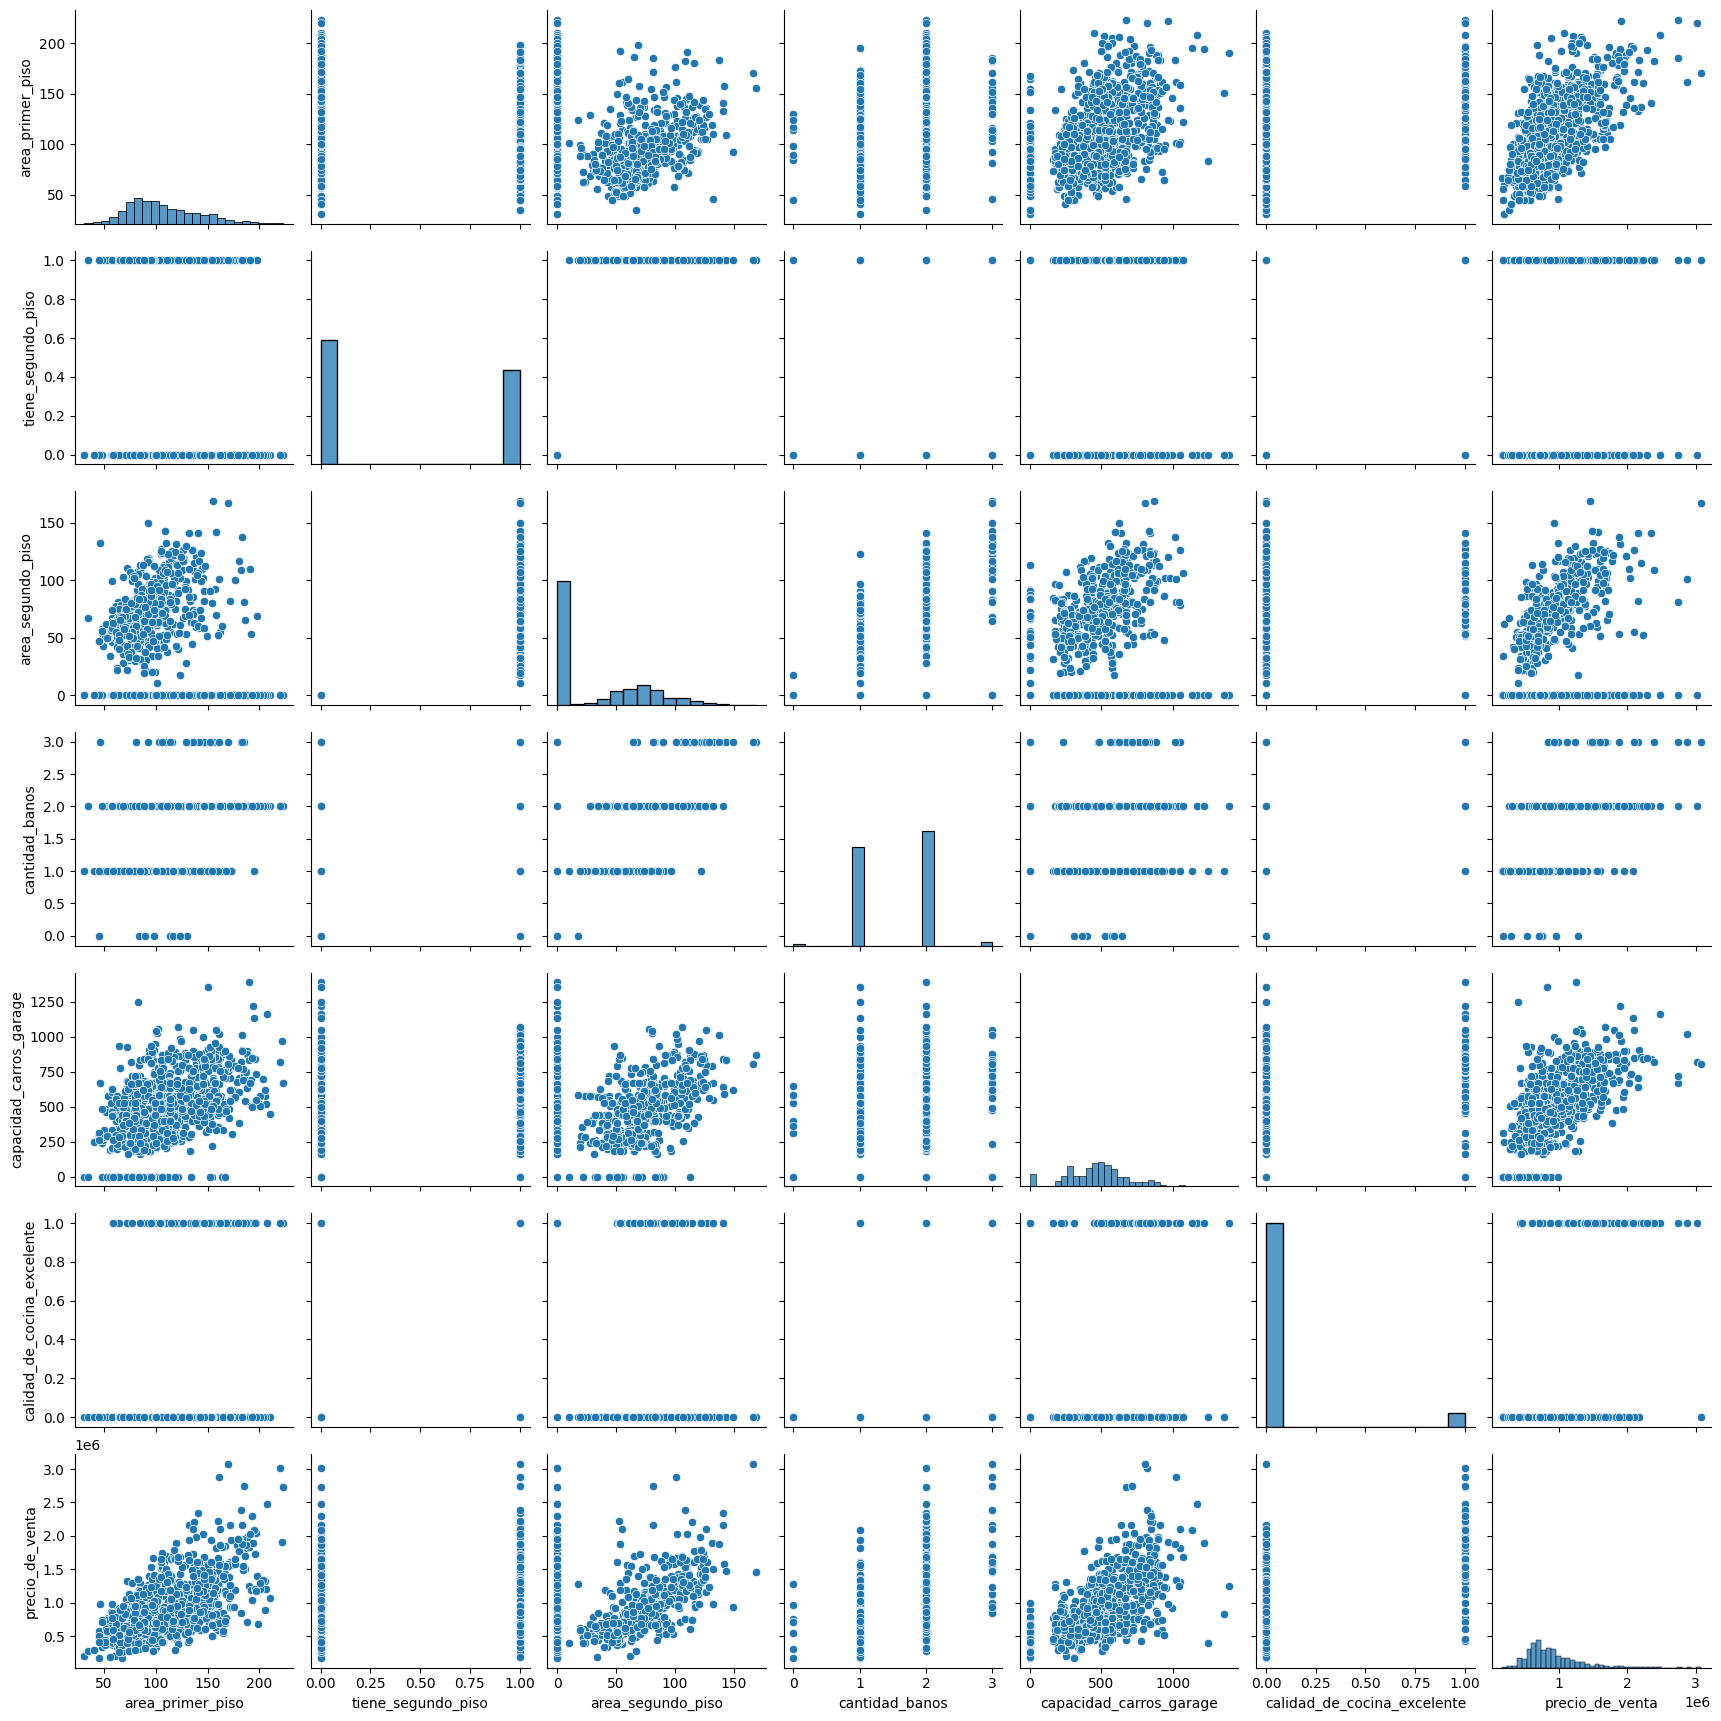

In [28]:
# cuáles otras características podrían explicar el precio de los inmuebles?
sns.pairplot(df)

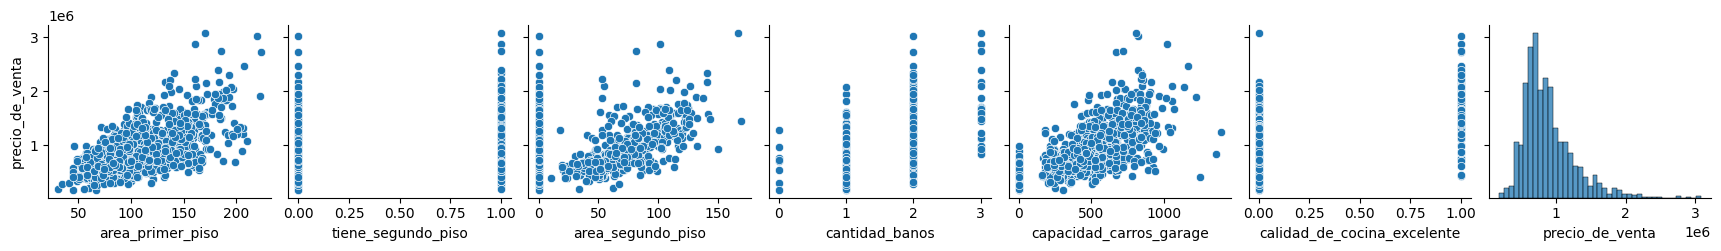

In [29]:
#Vamos a analizar solamente y_vars='precio_de_venta'
sns.pairplot(df, y_vars='precio_de_venta')

## Añadiendo factores al modelo

In [30]:
# importando la api de statsmodels
import statsmodels.api as sm

In [31]:
# Añadiendo una constante
X_train = sm.add_constant(X_train)

In [32]:
# Creando el modelo de regresión (con todas las variables): saturado
modelo_3 = sm.OLS(y_train, X_train).fit()

In [33]:
# Modelo sin la información del garage
modelo_4 = sm.OLS(y_train, X_train.drop(columns=["capacidad_carros_garage"])).fit()
# Modelo sin el área del segundo piso
modelo_5 = sm.OLS(y_train, X_train.drop(columns=["area_segundo_piso"])).fit()


In [34]:
# Resumen del modelos
modelos = [ modelo_3, modelo_4, modelo_5]
for i, j in enumerate(modelos):
  num = 2
  print("*************************")
  print(f"Modelo {i+3}")
  print("*************************")
  print(j.summary())


*************************
Modelo 3
*************************
                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     574.9
Date:                Mon, 04 Aug 2025   Prob (F-statistic):               0.00
Time:                        15:37:48   Log-Likelihood:                -15599.
No. Observations:                1150   AIC:                         3.121e+04
Df Residuals:                    1143   BIC:                         3.125e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [35]:
# Añadiendo una constante en X_test
x_test = sm.add_constant(X_test)

In [36]:
# Previsión con el modelo 3
y_predicion_3 = modelo_3.predict(x_test)


In [37]:
# Cuál es el R² del entrenamiento?
r2_score(y_test, y_predicion_3)

0.6817035570129

## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [38]:
# Nuevo inmueble
nueva_casa = pd.DataFrame({
    'area_primer_piso': [100],
    'tiene_segundo_piso': [1],
    'area_segundo_piso': [50],
    'cantidad_banos': [2],
    'capacidad_carros_garage': [2],
    'calidad_de_cocina_excelente': [1]
})

In [39]:
# Añadiendo una constante
nueva_casa_const = sm.add_constant(nueva_casa)

In [40]:
# Cuál es el precio del inmueble de acuerdo con el modelo 1?
precio_modelo_1 = modelo_1.predict(nueva_casa_const)
print(f"El precio predicho por el modelo 1 es: ${precio_modelo_1[0]:.2f}")

El precio predicho por el modelo 1 es: $835047.43


## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [41]:
raw = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/2145-data-science-probando-relaciones-con-regresion-lineal/refs/heads/aula-4/nuevas_casas.csv", sep=";")
raw

,Casa,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1
5,6,140,1,2,0
6,7,170,0,3,0
7,8,190,1,2,0
8,9,130,0,2,0
9,10,180,1,3,0


In [42]:
raw

,Casa,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1
5,6,140,1,2,0
6,7,170,0,3,0
7,8,190,1,2,0
8,9,130,0,2,0
9,10,180,1,3,0


In [43]:
# Añadiendo una constante
raw = sm.add_constant(raw)
raw = raw.drop(columns="Casa")

In [44]:
# Cuál es el precio de estas nuevas casas?

raw["precio_casas"] = round(modelo_1.predict(raw),2)
raw


,const,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente,precio_casas
0,1.0,150,1,2,1,1184366.69
1,1.0,180,0,3,1,1393958.24
2,1.0,120,1,2,1,974775.13
3,1.0,200,1,3,1,1533685.95
4,1.0,160,0,2,1,1254230.54
5,1.0,140,1,2,0,1114502.83
6,1.0,170,0,3,0,1324094.39
7,1.0,190,1,2,0,1463822.09
8,1.0,130,0,2,0,1044638.98
9,1.0,180,1,3,0,1393958.24


# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [45]:
# importar el VIF de statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# VIF 1
explicativas_modelo = ['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']

explicativas_modelo_5 = ['area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']

In [47]:
vif = pd.DataFrame()
vif["variables"] = explicativas_modelo_5
vif["VIF"] = [variance_inflation_factor(X_train[explicativas_modelo_5].values, i) for i in range(X_train[explicativas_modelo_5].shape[1])]
vif
#


,variables,VIF
0,area_primer_piso,13.763354
1,tiene_segundo_piso,2.356461
2,cantidad_banos,14.530240
3,capacidad_carros_garage,8.732815
4,calidad_de_cocina_excelente,1.147349


## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

In [48]:
# Utilizamos el modelo 0, pero lo mismo se podria hacer para cualquier modelo creado.

y_prediccion = modelo.predict(X_train)

In [51]:
fig = px.scatter(x=y_prediccion, y=y_train, trendline="ols", trendline_color_override="red", labels={"x":"valor previsto",
                                                                                                      "y":"valor real"})
fig.show()

El modelo de regresión lineal muestra un buen ajuste general a los datos de entrenamiento, evidenciado por la agrupación de los puntos en torno a la línea de regresión. Sin embargo, **su capacidad predictiva es menos fiable para los valores más altos**, donde la dispersión de los errores es mayor. Esto podría indicar que hay una **heterocedasticidad** (la varianza de los errores no es constante) o que el modelo lineal podría no capturar adecuadamente la complejidad de los datos en los rangos de valores más elevados.

In [52]:
errores = modelo.resid

In [53]:
fig = px.scatter(x=y_prediccion, y=errores, trendline="ols", trendline_color_override="red", labels={"x":"valor previsto",
                                                                                                      "y":"errores"})
fig.show()

La distribución de los residuos en forma de "embudo" o con una varianza no constante (lo que se conoce como heterocedasticidad) confirma que el modelo:

Es consistente y bastante preciso para predecir valores en el rango más bajo y medio (hasta 1 millón).

Pierde precisión y se vuelve menos confiable para predecir valores superiores al millón, donde los errores son mucho más grandes y la variabilidad en las predicciones es significativamente mayor.

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">